# [exp_05]: Thresholding on Shadow Detected Image

## Intorduction

Thresholding is an image processing technique used to separate features of interest from the background in an image. it involves setting a threshold value, which acts as a boundary to determine whether a pixel's intensity or color value is considered part of the object or background. we aim to use Thresholds to enhance the quality of images before performing object detection which prepares images for better object detection and classification performance.

Once objects are segmented using thresholding, various algorithms can be applied to detect and recognize objects based on their shape, size, texture, or other visual features.

There are many types of Thresholding in the context of Image Processing, where we will use the most famous types (THRESH_BINARY, THRESH_OTSU, ADAPTIVE_THRESH where the last type can apply with two ways: thresh_arithmetic_mean and thresh_gaussian_mean)

## Implementation

<u>**1.THRESH_BINARY:**</u> is a manual thresholding technique where the threshold value is specified by the user, then it works by setting all pixel values below a specified threshold to 0 and all pixel values equal to or above the threshold to a maximum value (which also specified by the user (usually 255)).

\begin{align*}
\text{dst}(x, y) &=  
\begin{cases} 
\text{maxValue}, & \text{if } \text{src}(x, y) \geq \text{threshold} \\
0, & \text{if } \text{src}(x, y) < \text{threshold}
\end{cases} \\
\end{align*}

This type of Thresholding is commonly used when there is a clear distinction between foreground and background intensities in the image.

<br><br><u>**2.THRESH_OTSU:**</u> is an automatic thresholding technique that selects the optimal threshold value based on the image histogram, Otsu's method assumes that the image contains two classes of pixels: foreground and background. it iteratively calculates the threshold value that minimizes the intra-class variance within each class and maximizes the inter-class variance between the classes.


Mathematically, THRESH_OTSU calculates the threshold value using a technique called the "maximum between-class variance" method:

$$
\sigma_B^2(T) = \omega_0(T) \cdot \omega_1(T) \cdot (\mu_0(T) - \mu_1(T))^2
$$

Where:
- $\omega_0(T) = \sum_{i=0}^{T} P(i):$ is the probability of the background class up to threshold $T$.
- $\omega_1(T) = \sum_{i=T+1}^{L-1} P(i):$ is the probability of the foreground class starting from threshold $T+1$.
- $\mu_0(T) = \sum_{i=0}^{T} \frac{i \cdot P(i)}{\omega_0(T)}:$ is the mean intensity of the background class up to threshold $T$.
- $\mu_1(T) = \sum_{i=T+1}^{L-1} \frac{i \cdot P(i)}{\omega_1(T)}:$ is the mean intensity of the foreground class starting from threshold $T+1$.
- $L:$ is the total number of intensity levels in the image.
- $P(i):$ is the normalized histogram of the image, representing the probability of intensity level $i$ occurring in the image.

This type of Thresholding is commonly used when to determine automatically the optimal threshold for image segmentation based on the distribution of pixel intensities in the image.

<br><br><u>**3.ADAPTIVE_THRESH:**</u> adaptive thresholding techniques such as THRESH_MEAN_C and THRESH_GAUSSIAN_C dynamically adjust the threshold value for each pixel based on the local neighborhood information. 

<u>**3-1.THRESH_MEAN_C (Arithmetic Mean):**</u> computes the threshold for each pixel based on the arithmetic mean intensity of the neighboring pixels within a specified window around it.

Mathematically, the threshold value for pixel (x, y) is determined as:

$$
T(x, y) = \frac{1}{N} \sum_{(x', y') \in \text{neighborhood of } (x, y)} I(x', y')
$$

Where:
- $N:$ is the total number of pixels in the neighborhood,
- $I(x', y'):$ is the intensity of pixel \( (x', y') \) in the neighborhood.

<br><br><u>**3-2.THRESH_GAUSSIAN_C (Gaussian Mean):**</u> computes the threshold for each pixel based on the weighted average (convolution) of the intensities of neighboring pixels within a specified window around it, using a Gaussian kernel.

Mathematically, the threshold value for pixel (x, y) is determined as:

$$
T(x, y) = \sum_{(x', y') \in \text{neighborhood of } (x, y)} I(x', y') \cdot G(x-x', y-y')
$$

Where:
- $I(x', y'):$ Represents the intensity or value of the pixel at position (x', y') in the neighborhood.
- $G(x-x', y-y'):$ Represents the weight or contribution of the pixel at position (x', y') in the neighborhood to the threshold value at pixel (x, y) (This weight is often determined by a Gaussian kernel, where the closer the pixel is to the center (x, y), the higher the weight it receives. This helps in giving more importance to the central pixels in the neighborhood).

<br>This type of Thresholding (ADAPTIVE_THRESH) is effective for segmenting images with varying lighting conditions and local image characteristics

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

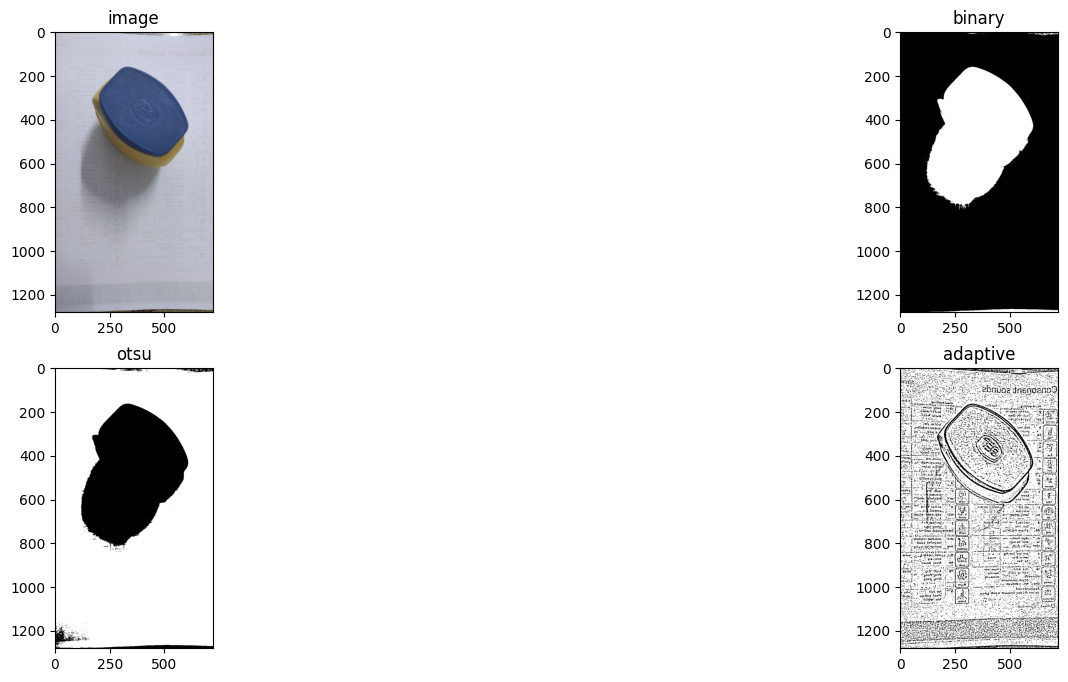

In [7]:
img = cv2.imread('img/05/simple_object_2.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img_shadow_detected = cv2.imread('../experiments/img/05/simple_object_2.jpg')
img_gray = cv2.cvtColor(img_shadow_detected,cv2.COLOR_BGR2GRAY)

_,thresh_binary = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)
_, thresh_otsu = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thresh_adaptive = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
plt.title('image')
plt.imshow(img,cmap='gray')

plt.subplot(2,2,2)
plt.title('binary')
plt.imshow(thresh_binary,cmap='gray')

plt.subplot(2,2,3)
plt.title('otsu')
plt.imshow(thresh_otsu,cmap='gray')

plt.subplot(2,2,4)
plt.title('adaptive')
plt.imshow(thresh_adaptive,cmap='gray')

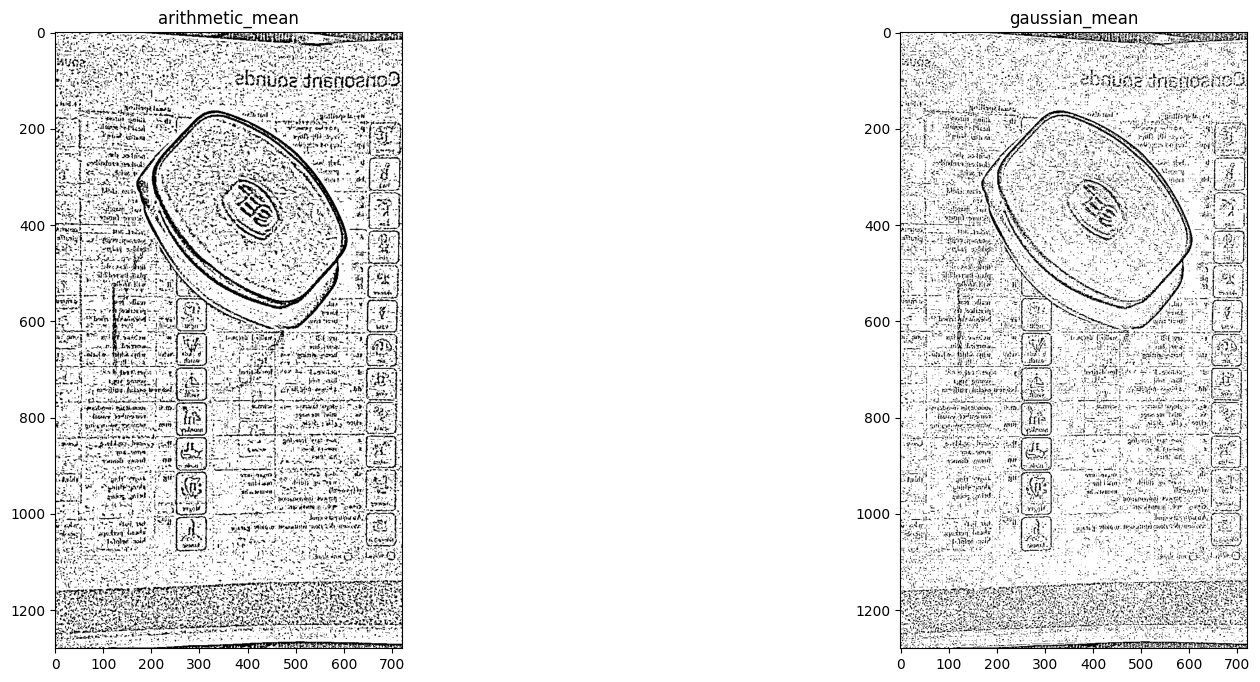

In [8]:
thresh_arithmetic = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh_gaussian = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('arithmetic_mean')
plt.imshow(thresh_arithmetic,cmap='gray')

plt.subplot(1,2,2)
plt.title('gaussian_mean')
plt.imshow(thresh_gaussian,cmap='gray')

## Conclusion

We determine visually (what is the best clarity for an object) that adaptive threshold (GAUSSIAN_C) is best type of other thresholding types that used (thresh_binary, thresh_otsu)